In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy.stats as stats
from scipy.signal import find_peaks
from scipy.interpolate import interp1d

from astropy.io import fits


In [27]:
%matplotlib inline

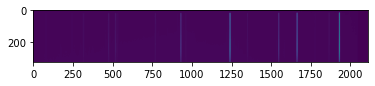

In [2]:
## Import test spectrum

path = '/Users/isabelkain/Desktop/ASTR257_2021/Project 4--Galaxy Rotation Curve'

arcs = fits.open(f'{path}/arcs.fits')[0]

plt.imshow(arcs.data)

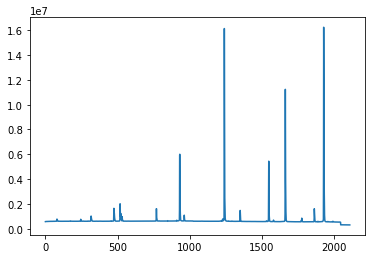

In [6]:
spectrum = np.sum(arcs.data, axis=0)
plt.plot(range(len(spectrum)), spectrum)

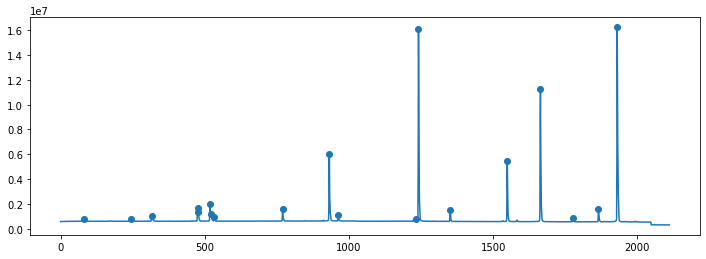

In [28]:
peaks_indx, __ = find_peaks(spectrum, height=0.07*10**7) # manually tune height req

plt.figure(figsize=(12,4))
plt.plot(range(len(spectrum)), spectrum)
plt.scatter(peaks_indx, spectrum[peaks_indx])

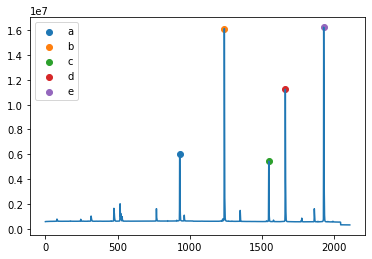

In [32]:
## Five tallest lines to the right:
# a. 404.656 nm
# b. 435.833 nm
# c. 467.816 nm
# d. 479.992 nm
# e. 508.582 nm

wvl = {'a':404.656, 
       'b':435.833,
       'c':467.816,
       'd':479.992,
       'e':508.582,
      }

## Visually match tallest lines to peak index

a = peaks_indx[-10]
b = peaks_indx[-7]
c = peaks_indx[-5]
d = peaks_indx[-4]
e = peaks_indx[-1]

## Check ID of peaks

plt.plot(range(len(spectrum)), spectrum)

plt.scatter(a, spectrum[a], label='a')
plt.scatter(b, spectrum[b], label='b')
plt.scatter(c, spectrum[c], label='c')
plt.scatter(d, spectrum[d], label='d')
plt.scatter(e, spectrum[e], label='e')

plt.legend()

In [37]:
ab = np.abs( (wvl['a']-wvl['b']) / (a - b) )
bc = np.abs( (wvl['b']-wvl['c']) / (b - c) )
cd = np.abs( (wvl['c']-wvl['d']) / (c - d) )
de = np.abs( (wvl['d']-wvl['e']) / (d - e) )
ae = np.abs( (wvl['a']-wvl['e']) / (a - e) )
bd = np.abs( (wvl['b']-wvl['d']) / (b - d) )

px_calib_vals = np.array([ab, bc, cd, de, ae, bd])
nm_per_px = np.mean(px_calib_vals)

print( px_calib_vals )

print( 'Avg nm/px:', nm_per_px )
print( 'Std:', np.std(px_calib_vals) )

[0.10089644 0.10384091 0.10587826 0.1074812  0.10413427 0.1043948 ]
Avg nm/px: 0.1044376467814818
Std: 0.002013650009413958


In [47]:
start_wvl = wvl['a'] - a*nm_per_px
end_wvl = wvl['a'] + (len(spectrum) - a)*nm_per_px

print(f'Min wavelength: {start_wvl} nm')
print(f'Max wavelength: {end_wvl} nm')

wavelengths = np.linspace(start_wvl, end_wvl, len(spectrum))

Min wavelength: 307.320113199659 nm
Max wavelength: 527.8924232021485 nm


Text(0, 0.5, 'Intensity')

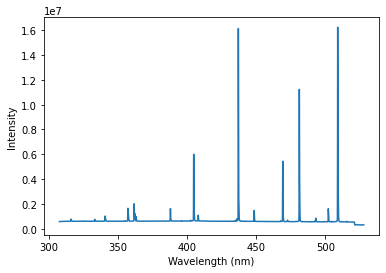

In [48]:
plt.plot(wavelengths, spectrum)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')


Text(0, 0.5, 'Intensity (counts)')

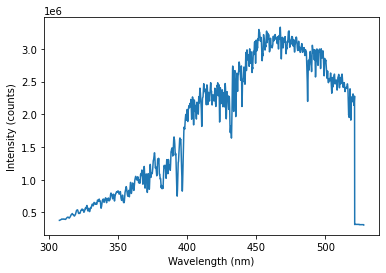

In [54]:
## Solar spectrum

s = fits.open(f'{path}/solar_spectrum.fits')[0]
solar = np.sum(s.data, axis=0)

plt.plot(wavelengths, solar) #  cmap='nipy_spectral'
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (counts)')

In [81]:
m = len(solar)
m+np.sqrt(2*m)

2176.9923072370875

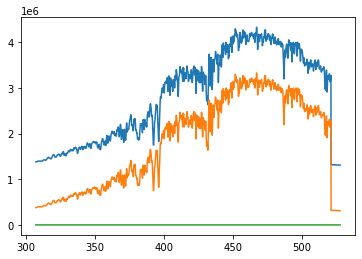

In [101]:
## Spline fit, remove

# f = interp1d(wavelengths, solar, kind='cubic')

from scipy.interpolate import splev, splrep, splprep, UnivariateSpline

spl = UnivariateSpline(wavelengths, solar, s=len(solar)//100)

# spl = splrep(wavelengths, solar, s=4100)
# yfit = splev(wavelengths, spl)

plt.plot(wavelengths, solar+10**6)
plt.plot(wavelengths, spl(wavelengths))
plt.plot(wavelengths, solar/spl(wavelengths))

In [111]:
fraunhofer = {'P':336.112,
              'N':358.121,
              'L':382.044,
              'K':393.366,
              'H':396.847,
              'h':410.175,
              'G':430.774,
              'G\'':434.047,
              'e':438.355,
              'd':466.814,
              'F':486.134,
              'c':495.761,
              'b4':516.733,
              'b3':516.891,
              'b2':517.270,
              'b1':518.362,
              'E2':527.039,
              'e':546.073,
              'D3':587.5618,
              'D2':588.995,
              'D1':589.592,
             }

fraunhofer.values()

dict_values([336.112, 358.121, 382.044, 393.366, 396.847, 410.175, 430.774, 434.047, 546.073, 466.814, 486.134, 495.761, 516.733, 516.891, 517.27, 518.362, 527.039, 587.5618, 588.995, 589.592])

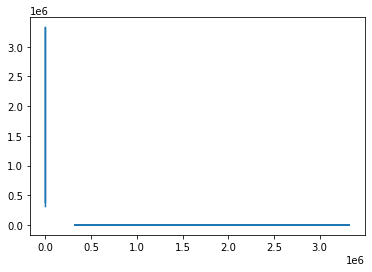

In [112]:
plt.plot(wavelengths, solar)
plt.hlines(fraunhofer.values(), solar.min(), solar.max())

242


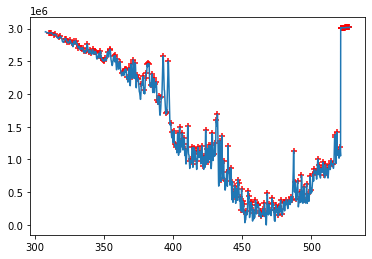

In [68]:
solar_peaks, __ = find_peaks(np.max(solar)-solar, height=0.1*10**6)
print(len(solar_peaks))

plt.plot(wavelengths, np.max(solar)-solar)
plt.scatter(wavelengths[solar_peaks], np.max(solar)-solar[solar_peaks], marker='+', color='r')